In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [4]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=42)

In [6]:
X.shape

(2000, 20)

In [8]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest

In [19]:
# Apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred=rf_model.predict_proba(X_train)
print("RF train roc auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1] ))) #2 probabilities 0 and 1: here 0=1st column and 1=second column
y_test_pred=rf_model.predict_proba(X_test)
print("RF train roc auc:{}".format(roc_auc_score(y_test,y_test_pred[:,1] )))

RF train roc auc:1.0
RF train roc auc:0.9882410583047526


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
y_train_pred=lr_model.predict_proba(X_train)
print("RF train roc auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1] ))) #2 probabilities 0 and 1: here 0=1st column and 1=second column
y_test_pred=lr_model.predict_proba(X_test)
print("RF train roc auc:{}".format(roc_auc_score(y_test,y_test_pred[:,1] )))

RF train roc auc:0.9725701313310101
RF train roc auc:0.9792436862500556


# Adaboost classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ab_model=AdaBoostClassifier()
ab_model.fit(X_train, y_train)
y_train_pred=ab_model.predict_proba(X_train)
print("RF train roc auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1] ))) #2 probabilities 0 and 1: here 0=1st column and 1=second column
y_test_pred=ab_model.predict_proba(X_test)
print("RF train roc auc:{}".format(roc_auc_score(y_test,y_test_pred[:,1] )))

C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RF train roc auc:0.9969009719678827
RF train roc auc:0.985613113001648


# knn classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=AdaBoostClassifier()
knn_model.fit(X_train, y_train)
y_train_pred=knn_model.predict_proba(X_train)
print("RF train roc auc:{}".format(roc_auc_score(y_train,y_train_pred[:,1] ))) #2 probabilities 0 and 1: here 0=1st column and 1=second column
y_test_pred=knn_model.predict_proba(X_test)
print("RF train roc auc:{}".format(roc_auc_score(y_test,y_test_pred[:,1] )))

C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RF train roc auc:0.9969009719678827
RF train roc auc:0.985613113001648


## focus on selecting the best threshold for maximum accuracy

In [30]:
pred=[]
for model in [rf_model,lr_model,ab_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9894214066188588


In [32]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.00,0.000085,0.296685,0.296685
1,0.96,0.999906,0.671976,0.671976
2,0.03,0.012118,0.462498,0.462498
3,0.23,0.724836,0.507158,0.507158
4,0.97,0.942548,0.532014,0.532014
...,...,...,...,...
595,0.93,0.701840,0.528289,0.528289
596,0.00,0.001898,0.300322,0.300322
597,0.04,0.087104,0.465746,0.465746
598,0.04,0.084019,0.445858,0.445858


In [34]:
final_prediction

0      0.148364
1      0.825964
2      0.241778
3      0.492288
4      0.744144
         ...   
595    0.672104
596    0.150636
597    0.264649
598    0.253934
599    0.707341
Length: 600, dtype: float64

In [36]:
#Calculate the roc curve

fpr,tpr, threshold=roc_curve(y_test, final_prediction)
threshold

array([       inf, 0.8457356 , 0.74365796, 0.74342229, 0.72579919,
       0.7245911 , 0.72167946, 0.71956472, 0.71175792, 0.7117124 ,
       0.6517302 , 0.65124612, 0.64405387, 0.6294988 , 0.62911804,
       0.62082063, 0.58009697, 0.57284546, 0.55231496, 0.5505204 ,
       0.50611065, 0.50534734, 0.49528626, 0.49228781, 0.49046681,
       0.45196025, 0.4479472 , 0.42873786, 0.42565077, 0.42273531,
       0.41983611, 0.41175455, 0.39822096, 0.38944742, 0.38540129,
       0.34886702, 0.34749987, 0.29282343, 0.29123733, 0.25602047,
       0.25600522, 0.23175474, 0.23164026, 0.13707706])

In [40]:
from sklearn.metrics import accuracy_score
acc=[]
for thres in threshold:
    y_pred=np.where(final_prediction>thres,1,0)
    acc.append(accuracy_score(y_test, y_pred, normalize=True))
    
acc=pd.concat([pd.Series(threshold), pd.Series(acc)], axis=1)
acc.columns=["Thresold","accuracy"]
acc.sort_values(by="accuracy",ascending=False, inplace=True)
acc.head()

,Thresold,accuracy
26,0.447947,0.960000
23,0.492288,0.960000
21,0.505347,0.960000
22,0.495286,0.958333
18,0.552315,0.958333


In [48]:
def plot_roc_auc(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1], color="darkblue",linestyle="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()

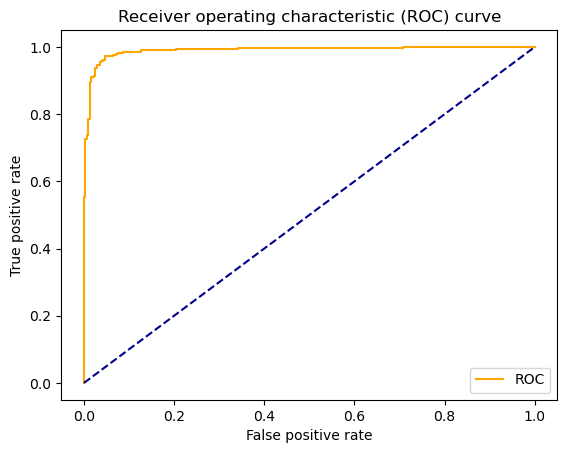

In [49]:
plot_roc_auc(fpr,tpr)